<a href="https://colab.research.google.com/github/wvirany/mini_projects/blob/main/gaussian_processes/GPR_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Processes for Regression



---


A reimplemntation from the scikit-learn tutorial: https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html

We will start by generating a synthetic dataset. The true function is defined as $f(x) = x\sin(x)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [2]:
X = np.linspace(start=0, stop=10, num=1000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

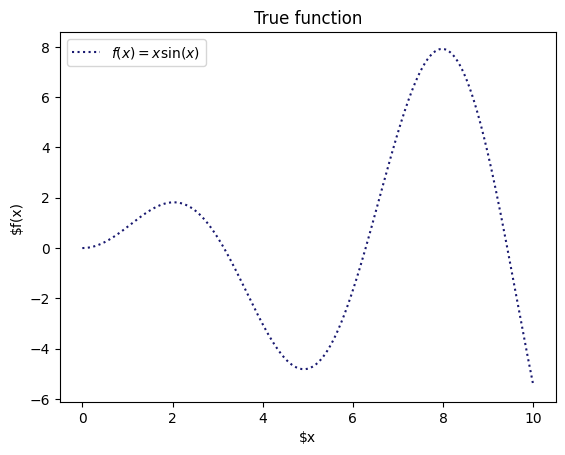

In [3]:
plt.plot(X, y, label=r'$f(x) = x\sin(x)$', ls='dotted', color='midnightblue')

plt.legend()
plt.xlabel('$x')
plt.ylabel('$f(x)')
plt.title('True function');

## Example with noise-free target

In [4]:
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)

X_train, y_train = X[training_indices], y[training_indices]

In [5]:
kernel = 1 * RBF(length_scale=1, length_scale_bounds=(1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

gpr.fit(X_train, y_train)
gpr.kernel_

5.02**2 * RBF(length_scale=1.43)

In [6]:
mean_prediction, std_prediction = gpr.predict(X, return_std=True)

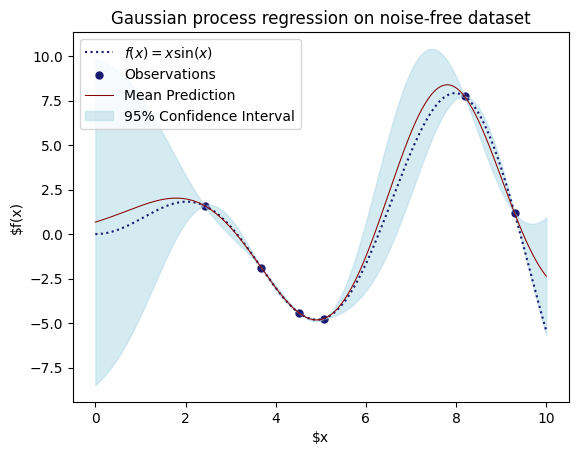

In [7]:
plt.plot(X, y, label=r'$f(x) = x\sin(x)$', ls='dotted', color='midnightblue')
plt.scatter(X_train, y_train, label='Observations', fc='midnightblue', ec='midnightblue', s=25, marker='o')
plt.plot(X, mean_prediction, label='Mean Prediction', color='darkred', lw=.75)
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=.5,
    label=r'95% Confidence Interval',
    color='lightblue'
)

plt.legend()
plt.xlabel('$x')
plt.ylabel('$f(x)')
plt.title('Gaussian process regression on noise-free dataset');

## Example with noisy targets

In [8]:
noise_std = .75
y_train_noisy = y_train + rng.normal(loc=0, scale=noise_std, size=y_train.shape)

In [9]:
gpr_noisy = GaussianProcessRegressor(
    kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9
)

gpr_noisy.fit(X_train, y_train_noisy)
mean_prediction, std_prediction = gpr_noisy.predict(X, return_std=True)

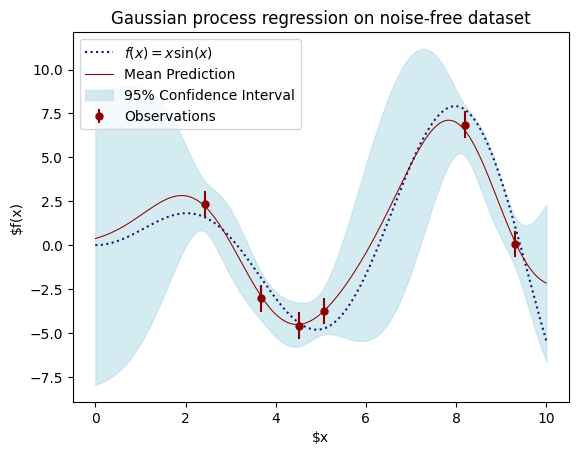

In [10]:
plt.plot(X, y, label=r'$f(x) = x\sin(x)$', ls='dotted', color='midnightblue')
plt.errorbar(
    X_train,
    y_train_noisy,
    noise_std,
    linestyle="None",
    color="darkred",
    marker=".",
    markersize=10,
    label="Observations"
)
plt.plot(X, mean_prediction, label='Mean Prediction', color='darkred', lw=.75)
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=.5,
    label=r'95% Confidence Interval',
    color='lightblue'
)

plt.legend()
plt.xlabel('$x')
plt.ylabel('$f(x)')
plt.title('Gaussian process regression on noise-free dataset');